In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
pip install trimesh

     |████████████████████████████████| 624kB 3.5MB/s 


In [3]:
!sudo apt-get install xvfb

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  xvfb
0 upgraded, 1 newly installed, 0 to remove and 33 not upgraded.
Need to get 784 kB of archives.
After this operation, 2,266 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 xvfb amd64 2:1.19.6-1ubuntu4.4 [784 kB]
Fetched 784 kB in 1s (990 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype


In [4]:
pip install xvfbwrapper

  Created wheel for xvfbwrapper: filename=xvfbwrapper-0.2.9-cp36-none-any.whl size=5010 sha256=0d326c3b90108ccd5f5719b8bdfc2a97322f0bb8f67fac28aea794e7fa112496
  Stored in directory: /root/.cache/pip/wheels/10/f2/61/cacfaf84b352c223761ea8d19616e3b5ac5c27364da72863f0
Successfully built xvfbwrapper


In [5]:
from xvfbwrapper import Xvfb
vdisplay = Xvfb()
vdisplay.start()

In [1]:
from pathlib import PosixPath
import os
import sys

import fastai.vision as faiv
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn
import torchvision

In [ ]:
import zipfile
from google.colab import drive

#drive.mount('/content/drive/')

zip_ref = zipfile.ZipFile("/content/drive/My Drive/STL/all-zipped.7z", 'r')
zip_ref.extractall("/tmp")
zip_ref.close()

In [ ]:
import zipfile
from google.colab import drive
with ZipFile('/content/drive/My Drive/STL/all-zipped.7z') as zipArch: #or a 7z file
    zipArch.extractall("drive/My Drive/STL/MRI") #If it is password protected

In [ ]:
pip install pyunpack

In [ ]:
pip install patool

     |████████████████████████████████| 81kB 2.2MB/s 


In [ ]:
from pyunpack import Archive
Archive('/content/drive/My Drive/STL/all-zipped.7z').extractall("drive/My Drive/STL/MRI")

In [7]:
#path = PosixPath('drive/My Drive/STL/MRI') Original Script
path = PosixPath('drive/My Drive/STL/MRI')

In [37]:
import trimesh
import numpy as np
from sys import argv
import glob
import os

folder = path
images = glob.glob(f'{folder}/*stl')
#os.makedirs(f'{folder}/Images_2d')

In [ ]:
for image in images:
    mesh = trimesh.load(image)

    # get edges we want to highlight by finding edges
    # that have sharp angles between adjacent faces
    edges = mesh.face_adjacency_edges[mesh.face_adjacency_angles > np.radians(30)]
    # get a Path3D object for the edges we want to highlight
    path = trimesh.path.Path3D(**trimesh.path.exchange.misc.edges_to_path(
        edges, mesh.vertices.copy()))

    # set the mesh face colors to white
    mesh.visual.face_colors = [255, 255, 255, 255]
    # create a scene with both the mesh and the outline edges
    scene = trimesh.Scene([mesh, path])

    # set the camera resolution
    scene.camera.resolution = (4000, 2000)
    # set the camera transform to look at the mesh
    scene.camera_transform = scene.camera.look_at(
        points=mesh.vertices,
        rotation=trimesh.transformations.euler_matrix(np.pi / 3, 0, np.pi / 5))

    # write a PNG of the render
    with open(f"{folder}/Images_2d_all/{image.split('/')[4][:-4]}.JPG", 'wb') as f:
        f.write(scene.save_image())


Training of Model

In [1]:
from pathlib import PosixPath
import os
import sys

import fastai.vision as faiv
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn
import torchvision

In [2]:
from fastai.vision import *

In [4]:
data_path = PosixPath('drive/My Drive/STL/MRI/Images_2d_all')

In [5]:
data = ImageDataBunch.from_folder(data_path, train="Train/", valid_pct=0.1) 

You can deactivate this warning by passing `no_check=True`.


/usr/local/lib/python3.6/dist-packages/fastai/basic_data.py:248: UserWarning: Your training dataloader is empty, you have only 63 items in your training set.
                 Your batch size is 64, you should lower it.
  Your batch size is {self.train_dl.batch_size}, you should lower it.""")


In [6]:
data

ImageDataBunch;

Train: LabelList (63 items)
x: ImageList
Image (3, 2000, 4000),Image (3, 2000, 4000),Image (3, 2000, 4000),Image (3, 2000, 4000),Image (3, 2000, 4000)
y: CategoryList
LH,LH,LH,LH,LH
Path: drive/My Drive/STL/MRI/Images_2d_all;

Valid: LabelList (7 items)
x: ImageList
Image (3, 2000, 4000),Image (3, 2000, 4000),Image (3, 2000, 4000),Image (3, 2000, 4000),Image (3, 2000, 4000)
y: CategoryList
RH,RH,RH,LH,LH
Path: drive/My Drive/STL/MRI/Images_2d_all;

Test: None

In [7]:
data.train_dl.batch_size = 2
data.valid_dl.batch_size = 2

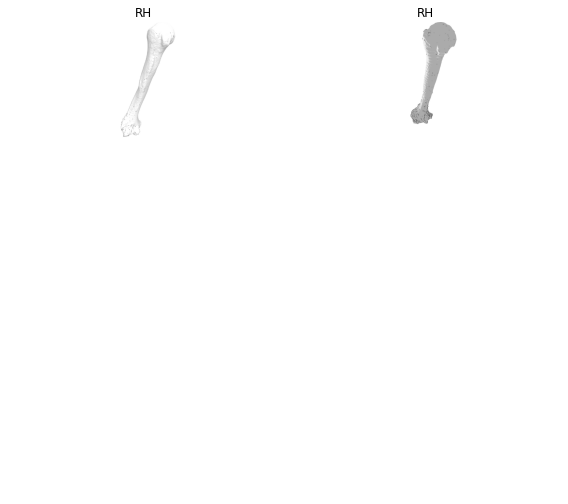

In [8]:
data.show_batch(2)

In [9]:
model = cnn_learner(data, models.resnet18, metrics=[accuracy, error_rate], path='.')

In [10]:
torch.cuda.empty_cache()
model.fit_one_cycle(10)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.206863,16.467602,0.428571,0.571429,25:34
1,1.110020,54.399059,0.428571,0.571429,26:38
2,1.091246,34.460609,0.428571,0.571429,26:35
3,0.990159,8.576449,0.571429,0.428571,26:55
4,0.865639,11.923494,0.571429,0.428571,26:58
5,0.987378,5.019745,0.571429,0.428571,26:51
6,0.919066,2.821115,0.571429,0.428571,26:50
7,0.891724,12.109246,0.571429,0.428571,26:55
8,0.892294,8.039831,0.571429,0.428571,26:57
9,0.781326,14.750417,0.571429,0.428571,26:55
